In [ ]:
%reset -f
import numpy as np
def r2d(r): return r*180/np.pi
def d2r(d): return d*np.pi/180
def dB(x): return 10*np.log10(x)
sind = lambda degrees: np.sin(np.deg2rad(degrees))
cosd = lambda degrees: np.cos(np.deg2rad(degrees))

pos = [[1,0],[1,1],[2,0],[2,1]]
h=3**.5 /2
for ij in pos:
  i,j=ij
  N=i**2+i*j+j**2
  print('N=',N)
  Q = (3*N)**0.5

  if i*j!=0: phi = r2d( np.arccos((Q**2+(2*i*h)**2 - (2*j*h)**2)/(4*Q*i*h)) )
  else: phi=0
  beta = phi+30
  betaa = beta
  
  for n in range(2,5): # expoente de perda de caminho
    alfa_tot=np.zeros(3); SIR=np.zeros(3);
    for t in range(1,4): # camada
      di = np.zeros(6*t); alfa = np.zeros(6*t);
      for ii in range(6*t): # cada estacao rb
        betaa = beta + 60/t * ii
        angulo = (betaa-beta)%(60) -30
        dist_nucleo=(Q*t*h)/np.abs(cosd(angulo))
        di[ii] = ( dist_nucleo**2 + 1 - 2*dist_nucleo*cosd(betaa))**.5
        alfa[ii] = di[ii]**(-n)
        # print(ii,betaa,angulo,round((dist_nucleo),4),round((di[ii]),4),round((alfa[ii]),4))    
      alfa_tot[t-1] = sum(alfa)
      SIR[t-1] = dB(1/sum(alfa_tot)) # considerando t camadas
      print('N=',N,'t=',t,'n=',n,'\t\talfa', round(alfa_tot[t-1],4), '\t\tSIR (dB)',round(SIR[t-1],2))
    contribuicoes = [iii/sum(alfa_tot)*100 for iii in alfa_tot]
    eSIR = [sir-SIR[-1] for sir in SIR[0:-1]] 
    print('Contribuições por camada (%): ',np.round(contribuicoes,2))
    print('Erro SIR (dB): ',np.round(eSIR,2))
    print()

N= 1
N= 1 t= 1 n= 2 		alfa 2.7857 		SIR (dB) -4.45
N= 1 t= 2 n= 2 		alfa 1.2969 		SIR (dB) -6.11
N= 1 t= 3 n= 2 		alfa 0.8344 		SIR (dB) -6.92
Contribuições por camada (%):  [56.65 26.38 16.97]
Erro SIR (dB):  [2.47 0.81]

N= 1 t= 1 n= 3 		alfa 2.358 		SIR (dB) -3.73
N= 1 t= 2 n= 3 		alfa 0.4661 		SIR (dB) -4.51
N= 1 t= 3 n= 3 		alfa 0.187 		SIR (dB) -4.79
Contribuições por camada (%):  [78.31 15.48  6.21]
Erro SIR (dB):  [1.06 0.28]

N= 1 t= 1 n= 4 		alfa 2.1658 		SIR (dB) -3.36
N= 1 t= 2 n= 4 		alfa 0.1772 		SIR (dB) -3.7
N= 1 t= 3 n= 4 		alfa 0.043 		SIR (dB) -3.78
Contribuições por camada (%):  [90.77  7.43  1.8 ]
Erro SIR (dB):  [0.42 0.08]

N= 3
N= 3 t= 1 n= 2 		alfa 0.7521 		SIR (dB) 1.24
N= 3 t= 2 n= 2 		alfa 0.4022 		SIR (dB) -0.62
N= 3 t= 3 n= 2 		alfa 0.2697 		SIR (dB) -1.53
Contribuições por camada (%):  [52.82 28.24 18.94]
Erro SIR (dB):  [2.77 0.91]

N= 3 t= 1 n= 3 		alfa 0.2913 		SIR (dB) 5.36
N= 3 t= 2 n= 3 		alfa 0.0761 		SIR (dB) 4.35
N= 3 t= 3 n= 3 		alfa 0.0336 		SI

d(km) 	 Pr (dBm - aproximada) 	 Pr (dBm - exata) 	 Erro (%) 
1 	 -28.42 		 -41.68 		 31.83
2 	 -40.46 		 -49.81 		 18.78
3 	 -47.5 		 -51.09 		 7.02
4 	 -52.5 		 -54.44 		 3.56
5 	 -56.38 		 -57.59 		 2.12
6 	 -59.54 		 -60.38 		 1.39
7 	 -62.22 		 -62.83 		 0.98
8 	 -64.54 		 -65.01 		 0.72
9 	 -66.59 		 -66.95 		 0.55
10 	 -68.42 		 -68.71 		 0.43
11 	 -70.07 		 -70.32 		 0.35
12 	 -71.58 		 -71.79 		 0.29
13 	 -72.97 		 -73.15 		 0.24
14 	 -74.26 		 -74.41 		 0.2
15 	 -75.46 		 -75.59 		 0.17
16 	 -76.58 		 -76.7 		 0.15
17 	 -77.63 		 -77.74 		 0.13
18 	 -78.63 		 -78.72 		 0.12
19 	 -79.57 		 -79.65 		 0.1
20 	 -80.46 		 -80.53 		 0.09


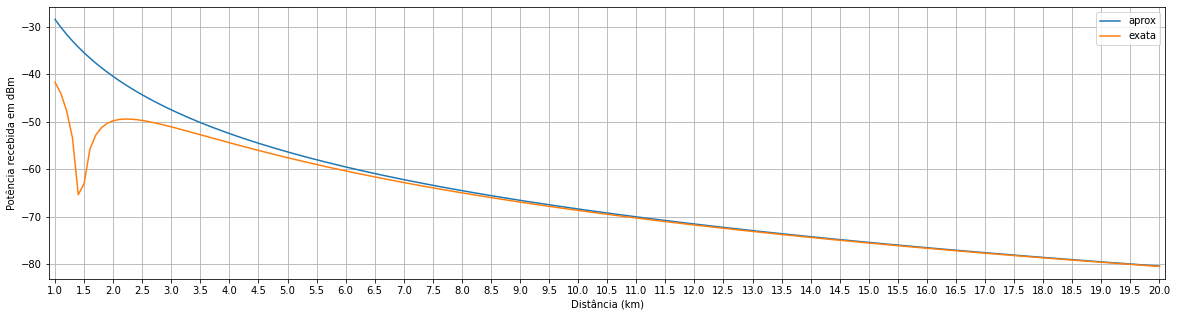

In [ ]:
# Potência de 1 a 20km
import numpy as np
import matplotlib.pyplot as plt

def erro(original,aprox): return (original-aprox)/original *100
def dBm(n): return 10*np.log10(n/1e-3)
def aprox(Pt,Gt,Gr,ht,hr,d): return Pt*Gt*Gr*ht**2*hr**2/d**4
def exata(f,ht,hr,d,Pt,Gt,Gr):
  c = 3e8;
  lambda_ = c/f
  d_1 = ((ht-hr)**2+d**2)**.5
  d_2 = ((ht+hr)**2+d**2)**.5
  # delta = d_2-d_1
  delta = 2*ht*hr/d
  teta_delta = 2*np.pi *delta/lambda_
  return Pt*Gt*Gr*lambda_**2*4*np.sin(teta_delta/2)**2 / ((4*np.pi)**2*d**2)

# Dados:
ht = 40; hr = 3; f = 1800e6; Gt=1;Gr=1; Pt=100;
dd=np.arange(1,20.01,.1)*1e3

Pr_aprox = aprox(Pt,Gt,Gr,ht,hr,dd)
Pr_exata = exata(f,ht,hr,dd,Pt,Gt,Gr)

print('d(km) \t Pr (dBm - aproximada) \t Pr (dBm - exata) \t Erro (%) ')
for d in range(1,21):
  ap = dBm(aprox(Pt,Gt,Gr,ht,hr,d*1e3))
  ex = dBm(exata(f,ht,hr,d*1e3,Pt,Gt,Gr))
  print(d,'\t',np.round(ap,2),'\t\t',np.round(ex,2),'\t\t',np.round(erro(ex,ap),2))

# print(dd/1e3,np.round(Pr_aprox,20),np.round(Pr_exata,4))

plt.figure(figsize=(20,5)); 
plt.plot(dd/1e3,dBm(Pr_aprox))
plt.plot(dd/1e3,dBm(Pr_exata))
plt.grid('on')
plt.xticks(np.arange(1,21,.5)); plt.xlim([1-.1,20.1]);
plt.legend(['aprox','exata']); 
plt.ylabel('Potência recebida em dBm'); plt.xlabel('Distância (km)');
plt.show()

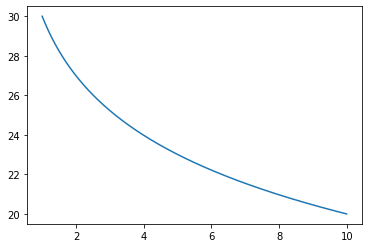

In [ ]:
d = np.arange(1,10,.01)
x = 1/d
plt.plot(d,dBm(x))